In [3]:
# Data Processiong library
import pandas as pd
import numpy as np

# Visualizations library
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score ,mean_squared_error


Collecting data & EDA

In [4]:
VG_df=pd.read_csv('vgsales.csv')
VG_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
VG_df.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16596.000000
mean,8300.605254,0.263768,0.145958,0.077801,0.048070,0.537498
std,4791.853933,0.816594,0.505120,0.309294,0.188588,1.555113
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
VG_df.dtypes

Rank              int64
Name             object
Platform         object
Year             object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
# to know if there are null values
VG_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [8]:
# delete rows that contain null values in the All feature
VG_df.isna().sum(axis=1).shape
VG_df.dropna(inplace=True)
VG_df.shape
VG_df.isna().sum(axis=0)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
VG_nan = VG_df[VG_df.isna().any(axis=1)] 
VG_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          0 non-null      int64  
 1   Name          0 non-null      object 
 2   Platform      0 non-null      object 
 3   Year          0 non-null      object 
 4   Genre         0 non-null      object 
 5   Publisher     0 non-null      object 
 6   NA_Sales      0 non-null      float64
 7   EU_Sales      0 non-null      float64
 8   JP_Sales      0 non-null      float64
 9   Other_Sales   0 non-null      float64
 10  Global_Sales  0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 0.0+ bytes


In [10]:
#delete Rank column 
VG_df.drop('Rank', axis=1,inplace=True)
VG_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [11]:
## to know if there are duplicate

VG_df.duplicated().sum()

0

In [12]:
#cheking DataFram types
VG_df.dtypes 

#Chnage type of Year
VG_df['Year']=VG_df.Year.astype('int64')

VG_df.dtypes.copy

<bound method NDFrame.copy of Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object>

Q1: Are there a different local Sales related to each other in countries?

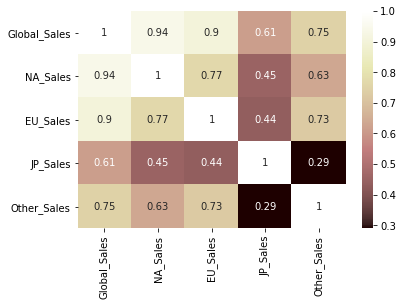

In [13]:
#Correlation of sales in different countries.
c=VG_df[['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
c
sns.heatmap(c.corr(), annot=True ,cmap='pink')
plt.show()

#According to table, We see that Global,North American,European an Other countries sales (Except Japan),have strong correlated
#but on Japanese sales is weakly correlated with other local sales.


Q2: What is the highest selling Genre of video game in global sales and North America

<ipython-input-14-bc420eb5694d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  VG_df.groupby([VG_df['Genre']])['Global_Sales','NA_Sales'].sum().plot(kind = 'bar', figsize = (17,7))


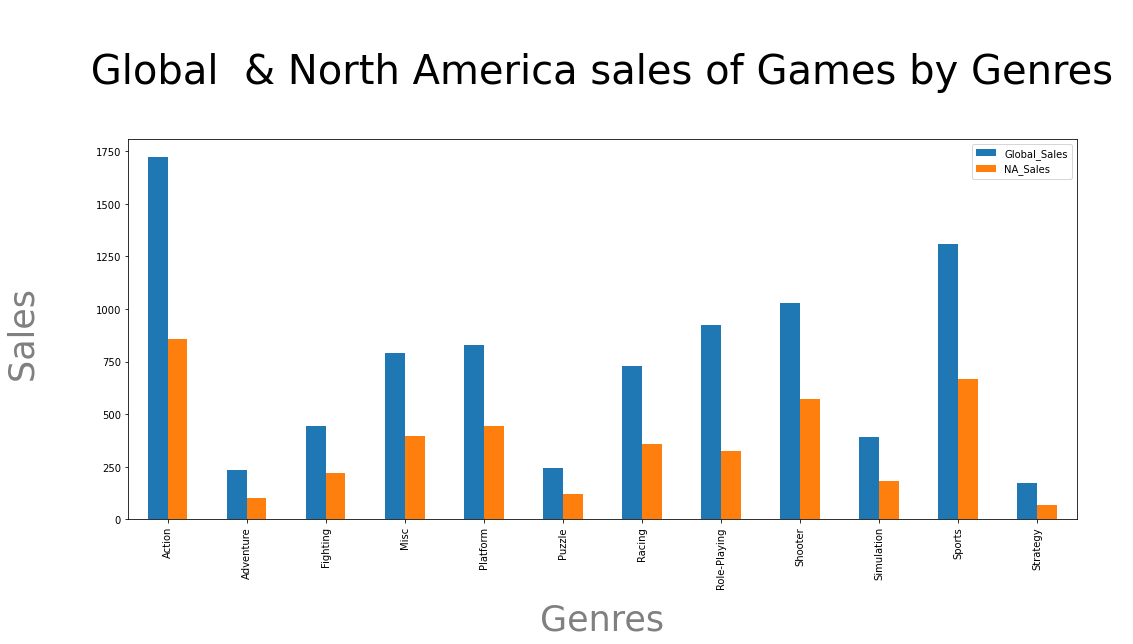

In [14]:
VG_df.groupby([VG_df['Genre']])['Global_Sales','NA_Sales'].sum().plot(kind = 'bar', figsize = (17,7))
plt.title('\n Global  & North America sales of Games by Genres \n',color='black', fontsize=40)
plt.xlabel('Genres',color='gray',labelpad=15, fontsize=35)
plt.ylabel('Sales \n',color='gray',labelpad=15, fontsize=35)
plt.show();
#Action genre is the highest sale in each country


Q3: Who are the most popular publishers in Global Sales?

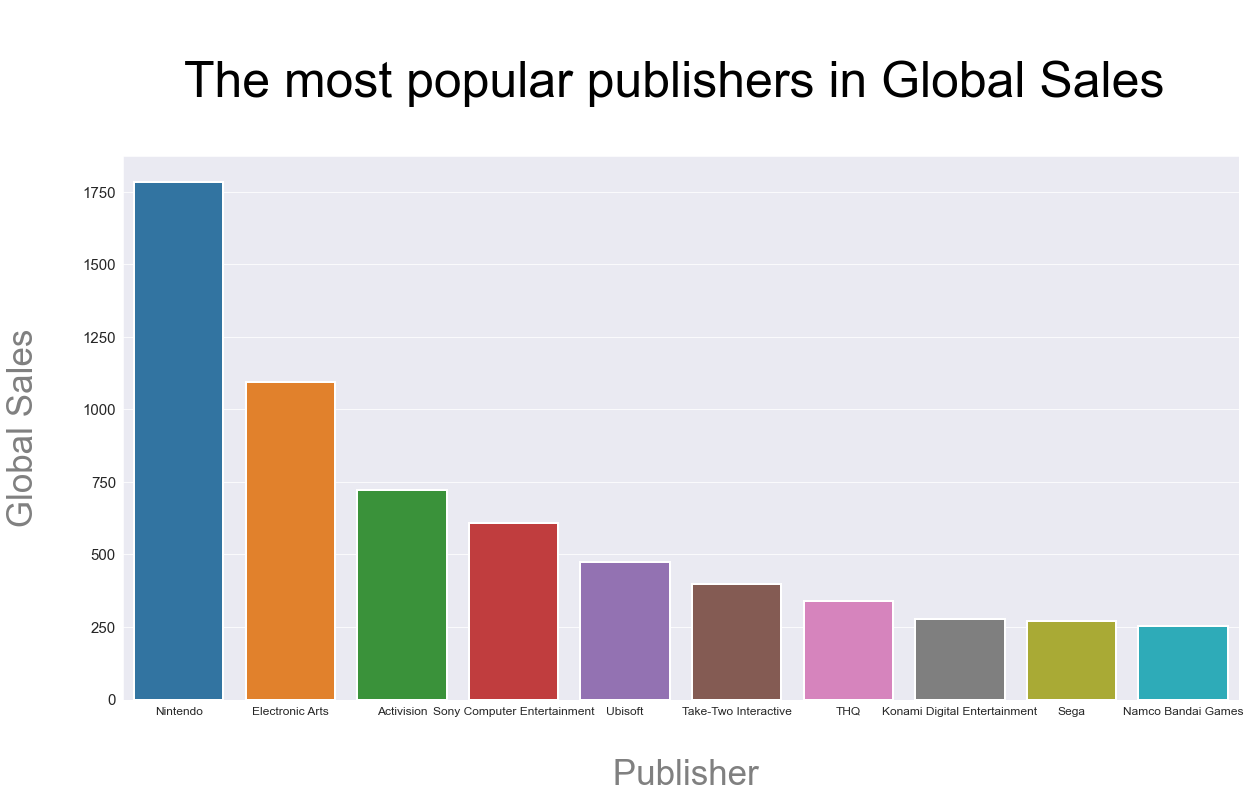

In [51]:
top_pub=VG_df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (20,10))
sns.barplot(y=top_pub["Global_Sales"], x=top_pub["Publisher"],linewidth=2)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel(" Global Sales \n", color='gray', fontsize=35)
plt.xlabel("\n Publisher", color='gray', fontsize=35)
plt.title("\nThe most popular publishers in Global Sales \n", color='black', fontsize=50)
ax = plt.gca()
plt.show();

Q4: Which is the most popular Platform in Global Sales?

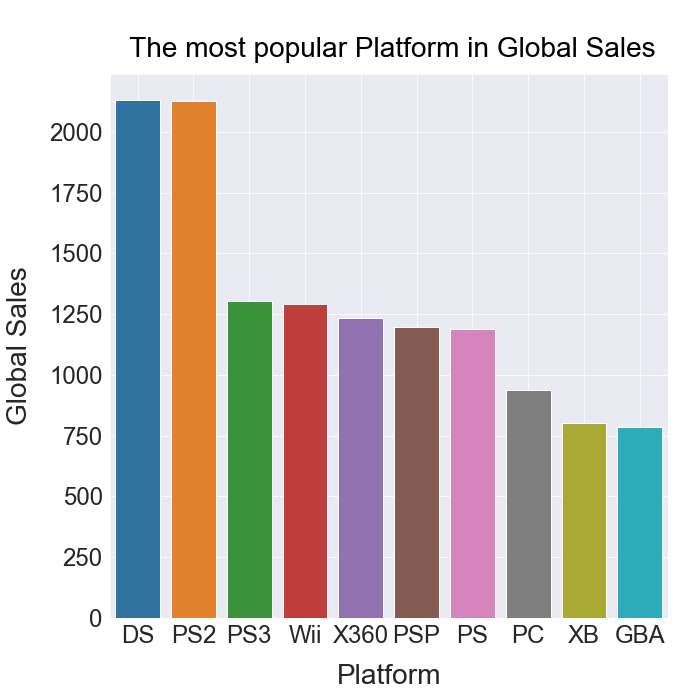

In [54]:
sns.set_style("darkgrid")
num_games=VG_df.groupby('Platform').size().sort_values(ascending=False).reset_index()[:10]
num_games.columns=['Platform', 'Global_Sales']
plt.figure(figsize=(10,10))
sns.barplot(y=num_games["Global_Sales"], x=num_games["Platform"], linewidth=1)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Global Sales", labelpad=16, fontsize=28)
plt.xlabel("Platform", labelpad=16, fontsize=28)
plt.grid(True)
plt.title("\n The most popular Platform in Global Sales", color='Black', fontsize=28, y=1.02)
plt.show();
#DS is having highest values

### Q5: who are the highest sales? 

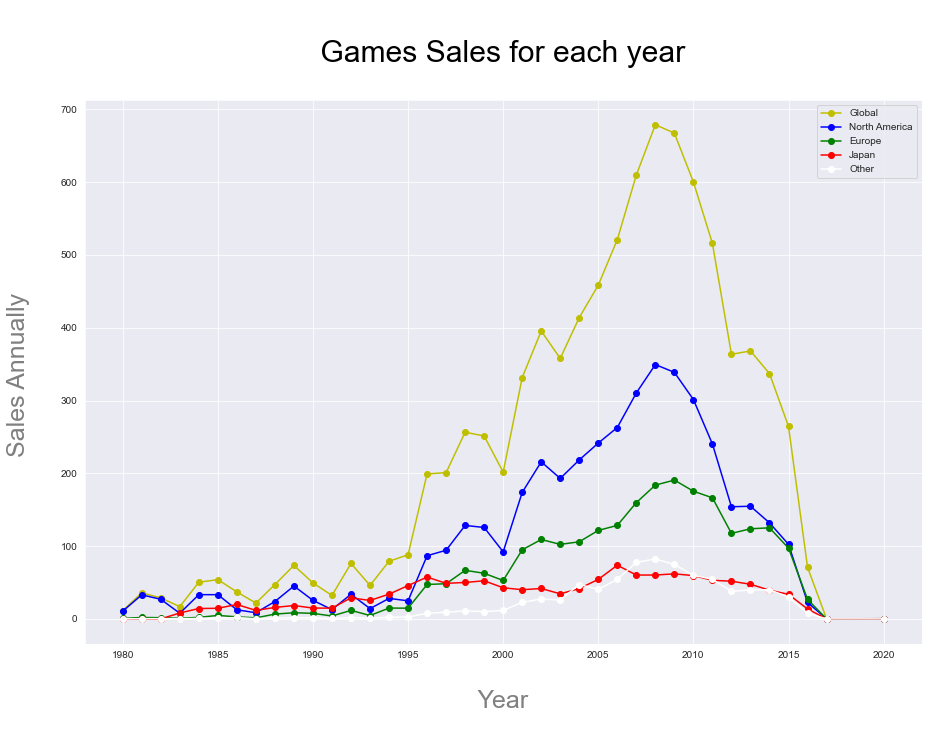

In [56]:
year_df = VG_df.groupby('Year')[['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum()

plt.figure(figsize=(15,10))

plt.plot(year_df.Global_Sales, 'o-y')
plt.plot(year_df.NA_Sales, 'o-b')
plt.plot(year_df.EU_Sales, 'o-g')
plt.plot(year_df.JP_Sales, 'o-r')
plt.plot(year_df.Other_Sales, 'o-w')


plt.xlabel('\n Year \n',fontsize=25,color='gray')
plt.ylabel('Sales Annually \n',fontsize=25,color='gray')
plt.title('\n Games Sales for each year \n',fontsize=30,color='black')
plt.legend(['Global','North America', 'Europe', 'Japan','Other']);

#n the above graph, we see that Global  typically has had higher sales over the years for video games
#  and the lowest sales is Japan.

Builiding the model

In [72]:
x= VG_df[['Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y= VG_df[['Global_Sales']]

#Splitting into train and test sets for both parameters
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

# Building the model:
lr = LinearRegression()


# Fit the model on training data:

lr.fit(x_train, y_train)

# Predict the testing data:
lr_predict = lr.predict(x_test)
lr_predict



array([[0.16074083],
       [0.01223865],
       [0.02172905],
       ...,
       [0.01198198],
       [0.87316378],
       [0.16184324]])

In [73]:
y_train.head()

,Global_Sales
3896,0.51
15718,0.02
1258,1.50
7638,0.20
11690,0.08


In [74]:
#R Squared + MSE 
lr_MSE=mean_squared_error(y_test, lr_predict)
print("LinearRegression MSE:",lr_MSE*100,"\n")


# Show R_Squared on the training data 
train_r2=lr.score(x_train, y_train)
print('R^2 Score trining data:',train_r2 * 100,"%")


# Show R-squared value of the model on the predict data
test_r2=r2_score(y_test, lr_predict)
print('R^2 Score testing data:',test_r2* 100,"%")

LinearRegression MSE: 0.0874710705492482 

R^2 Score trining data: 99.92402282815371 %
R^2 Score testing data: 99.9633081668497 %


In [75]:
#Comparison between Actual and Predicted value.

a=np.squeeze(y_test)
df1 = pd.DataFrame()
df1["Actual"]=np.squeeze(y_test*100)
df1["Predicted"]=np.squeeze(lr_predict*100)
df1.head()

,Actual,Predicted
8528,16.0,16.074083
16502,1.0,1.223865
15605,2.0,2.172905
13795,4.0,4.262940
5588,32.0,33.183097


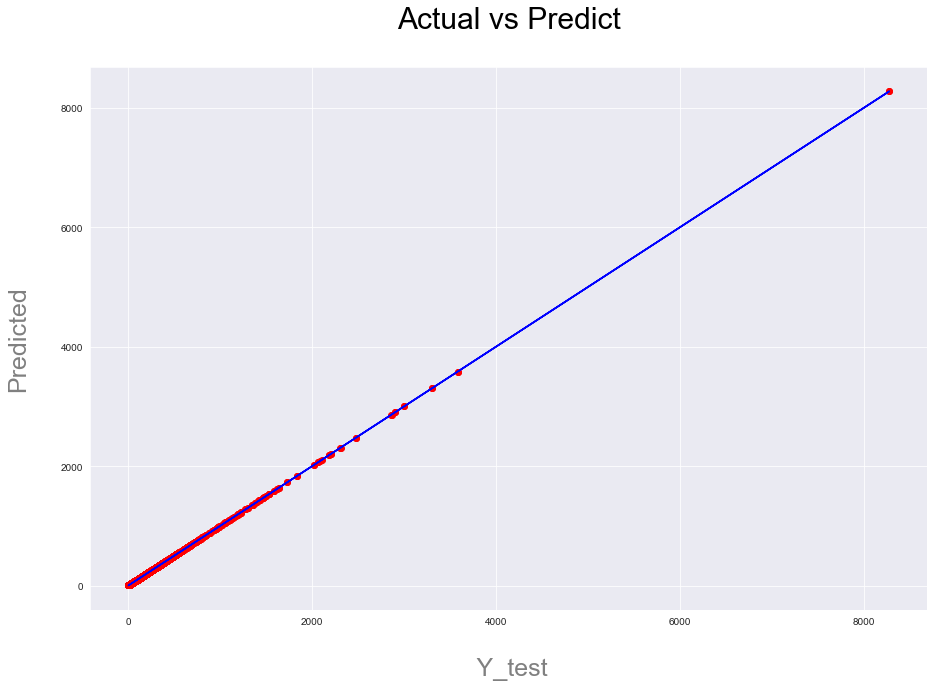

In [76]:
#Comparison between Actual and Predicted value.

plt.figure(figsize=(15,10))
plt.scatter(df1, df1,color="red")
plt.plot(df1,df1,'-b')
plt.xlabel('\n Y_test', fontsize=25,color = "gray")
plt.ylabel('Predicted\n', fontsize=25,color = "gray")
plt.title('Actual vs Predict\n',fontsize=30,color = "black")
plt.show()
#the line shows an positive correlation
#is very little scatter that is it is showing there is strong correlation between the variables
# that predicted values are close to the actual ones

In [77]:
print("X_train shape: {}".format(x_train.shape))
print("Y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(x_test.shape))
print("Y_test shape: {}".format(y_test.shape))

X_train shape: (3257, 5)
Y_train shape: (3257, 1)
X_test shape: (13032, 5)
Y_test shape: (13032, 1)


Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestRegressor
x= VG_df[['Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y= VG_df[['Global_Sales']]
xx_train, xx_test, yy_train, yy_test = train_test_split(x, y, test_size=0.8, random_state=42)

RF = RandomForestRegressor(n_estimators=20)  
RF.fit(xx_train, yy_train)  
RF_predict = RF.predict(xx_test) 

<ipython-input-78-8175ae6740e6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(xx_train, yy_train)


In [79]:
RF_MSE = mean_squared_error(y_test, RF_predict)
print("Random Forest MSE:",RF_MSE*100,"\n")

# Show R_Squared on the training data 
r2=RF.score(x_train, y_train)
train_RF_r2=r2*100
print('Random Forest R^2 Score trining data:',train_RF_r2,"%")

# Show R-squared value of the model on the predict data
R2=r2_score(y_test, RF_predict)
test_RF_r2=R2*100
print('Random Forest R^2 Score testing data:',test_RF_r2,"%")


Random Forest MSE: 27.058812375181724 

Random Forest R^2 Score trining data: 99.20183985774267 %
Random Forest R^2 Score testing data: 88.64953380950739 %


In [168]:
#MSE of Linear Regression

print("MSE of Linear Regression Model is ",mean_squared_error(y_test, (lr_predict))*10)

MSE of Linear Regression Model is  0.00874710705492482


In [169]:
#MSE of Random Forest

print("MSE of RF Model is ",mean_squared_error(y_test, (RF_predict))*10)

MSE of RF Model is  2.7058812375181724


In [82]:
#Comparison between Actual and Predicted value in linear regression.

dd=np.array(y_test*100).flatten()
lrr=(lr_predict*100).flatten()
error222 = pd.DataFrame({'Actual-Values': dd, 'Predicted-Values': lrr})
error222.head(15) #try for linear

,Actual-Values,Predicted-Values
0,16.0,16.074083
1,1.0,1.223865
2,2.0,2.172905
3,4.0,4.262940
4,32.0,33.183097
5,11.0,11.269233
6,43.0,44.596705
7,13.0,13.262526
8,64.0,64.322165
9,25.0,25.419468


In [83]:
#Comparison between Actual and Predicted value in Random forest.
d=np.array(yy_test*100).flatten()
f=(RF_predict*100).flatten
error22 = pd.DataFrame({'Actual-Values': d , 'Predicted-Values': f ()})
error22.head(15) 

,Actual-Values,Predicted-Values
0,16.0,13.650000
1,1.0,1.000000
2,2.0,2.000000
3,4.0,4.416667
4,32.0,34.150000
5,11.0,11.025000
6,43.0,44.100000
7,13.0,12.150000
8,64.0,76.100000
9,25.0,28.150000


In [60]:
#Random forest is likely an improvement, but still not quite as good as the linear regression.

In [113]:
a1=np.squeeze(yy_test)
df2 = pd.DataFrame()
df2["Actual"]=np.squeeze(yy_test*100)
df2["Predicted"]=np.squeeze(RF_predict*100)
df2.head()

,Actual,Predicted
8528,16.0,13.650000
16502,1.0,1.000000
15605,2.0,2.000000
13795,4.0,4.416667
5588,32.0,34.150000


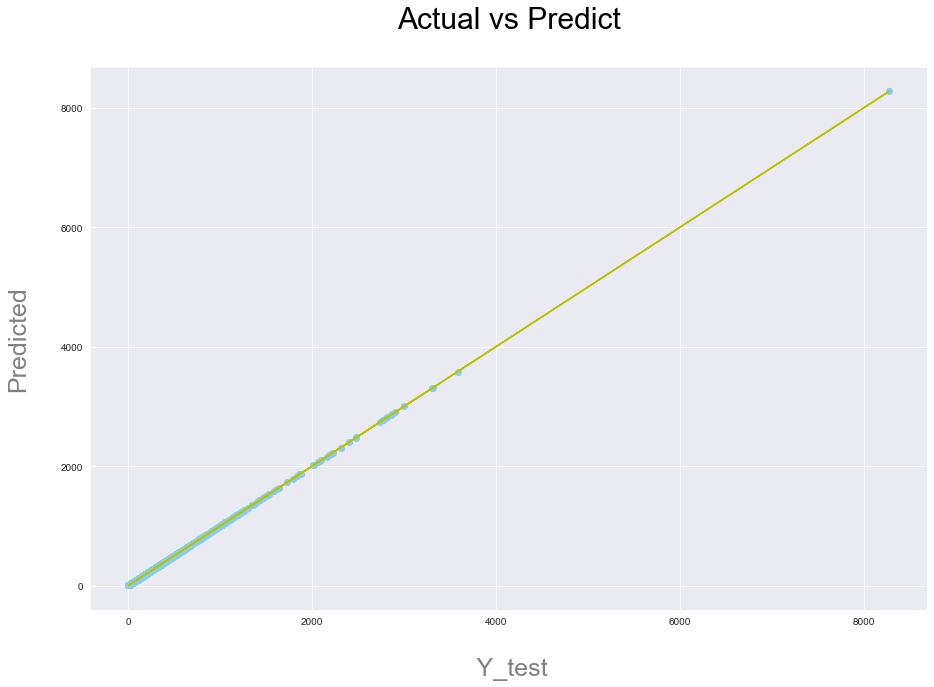

In [165]:
#Comparison between Actual and Predicted value.

plt.figure(figsize=(15,10))
plt.scatter(df2, df2,color="skyblue")
plt.plot(df2,df2,'-y')
plt.xlabel('\n Y_test', fontsize=25,color = "gray")
plt.ylabel('Predicted\n', fontsize=25,color = "gray")
plt.title('Actual vs Predict\n',fontsize=30,color = "black")
plt.show()
#the line shows an positive correlation
#is very little scatter that is it is showing there is strong correlation between the variables
# that predicted values are close to the actual ones

###### 

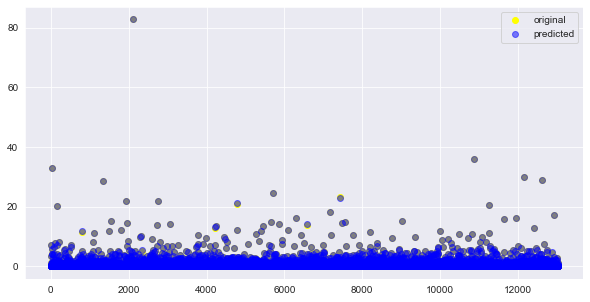

In [170]:
r = range(len(y_test))
plt.figure(figsize=(10,5))
plt.scatter(r, y_test, color="yellow", label="original")
plt.scatter(r, lr_predict, color="blue", label="predicted",alpha=0.5)
plt.legend()
plt.show()

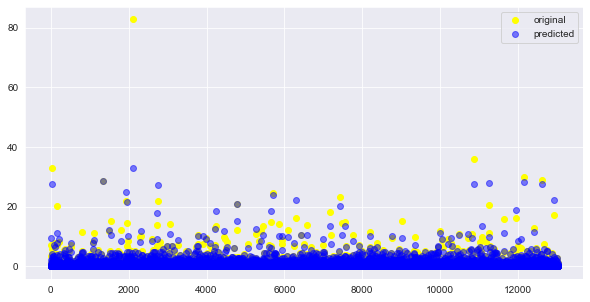

In [172]:
x_ax = range(len(yy_test))
plt.figure(figsize=(10,5))
plt.scatter(x_ax, yy_test, color="yellow", label="original")
plt.scatter(x_ax, RF_predict, color="blue", label="predicted",alpha=0.5)
plt.legend()
plt.show()